In [1]:
import pandas as pd  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import silhouette_score  
from sklearn.datasets import make_blobs  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os
import math
get_ipython().magic('matplotlib inline')


/var/folders/09/wbb5c_x5097glbw2s6c8vcj40000gn/T/ipykernel_94714/3528997724.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


In [2]:
# 数据导入
os.chdir(r'/Users/niuko/作业/供应链系统设计与规划/供应链系统规划与设计实验课程材料/13 实验十三数据处理：基于K-mean的聚类分析/')
data = pd.read_excel("aggregating-customers.xlsx")
data.set_index('ShipmentID', inplace=True)  
data.head(10)

,Mode,X,Y,Demand
ShipmentID,,,,
1,TL,59,39,30520
2,TL,68,30,35468
3,TL,35,85,40619
4,TL,27,61,37463
5,TL,32,52,44799
6,TL,65,68,41661
7,TL,32,56,40772
8,TL,56,62,26378
9,TL,24,34,24645


In [3]:
data.describe()

,X,Y,Demand
count,150.000000,150.000000,150.000000
mean,48.020000,54.866667,35237.060000
std,17.986374,19.223401,6426.759787
min,20.000000,20.000000,22679.000000
25%,32.000000,38.000000,30232.500000
50%,47.000000,55.000000,35629.000000
75%,63.000000,71.000000,41205.000000
max,79.000000,90.000000,44941.000000


In [6]:
# 计算分类变量频率
data['Mode'].value_counts()

Mode
TL     119
LTL     31
Name: count, dtype: int64

In [7]:
# 数据探索与数据清洗
data.dtypes

Mode      object
X          int64
Y          int64
Demand     int64
dtype: object

In [8]:
data['Mode']=data['Mode'].astype(str)
data.dtypes

Mode      object
X          int64
Y          int64
Demand     int64
dtype: object

In [9]:
##查看有无重复值
data.duplicated().sum()

## 重复值的处理，如果有的话
# data_location_unique = data_location.drop_duplicates(keep='last') # 保留最后一次出现的项 
# data_location_unique = data_location.drop_duplicates(subset=['column1', 'column2']) # 只删除指定列的重复项

0

In [10]:
##查看有无缺失值
data.isnull().any()

# if data.isnull().any().any():
#    print("有缺失值")
# else:
#    print("没有缺失值")

## 缺失值的处理，如果有的话
# data_location.fillna(value=0, inplace=True)  # 将所有缺失值替换为0或value被赋的值，inplace=True允许直接在原DataFrame基础上进行修改
# data_location.dropna(inplace=True)  # 删除包含任何缺失值的行

Mode      False
X         False
Y         False
Demand    False
dtype: bool

In [11]:
## 根据需求量的K-mean聚类分析
# 筛选“Model”为“TL”的数据  
data_demand_TL = data[data['Mode'] == 'TL']  
data_demand_TL.head(10)

,Mode,X,Y,Demand
ShipmentID,,,,
1,TL,59,39,30520
2,TL,68,30,35468
3,TL,35,85,40619
4,TL,27,61,37463
5,TL,32,52,44799
6,TL,65,68,41661
7,TL,32,56,40772
8,TL,56,62,26378
9,TL,24,34,24645


In [12]:
# 查看数据特征
data_demand_TL.describe()

,X,Y,Demand
count,119.000000,119.000000,119.000000
mean,47.386555,54.941176,35210.109244
std,17.825001,19.304998,6512.841722
min,20.000000,20.000000,22679.000000
25%,32.000000,38.000000,30447.500000
50%,46.000000,55.000000,35506.000000
75%,63.000000,71.000000,41284.000000
max,79.000000,90.000000,44941.000000


In [13]:
data_demand_TL['Demand'].agg(['var','std','skew'])

var     4.241711e+07
std     6.512842e+03
skew   -2.140561e-01
Name: Demand, dtype: float64

/var/folders/09/wbb5c_x5097glbw2s6c8vcj40000gn/T/ipykernel_94714/4088844201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_demand_TL['Demand'],hist=True,kde=True)


<Axes: xlabel='Demand', ylabel='Density'>

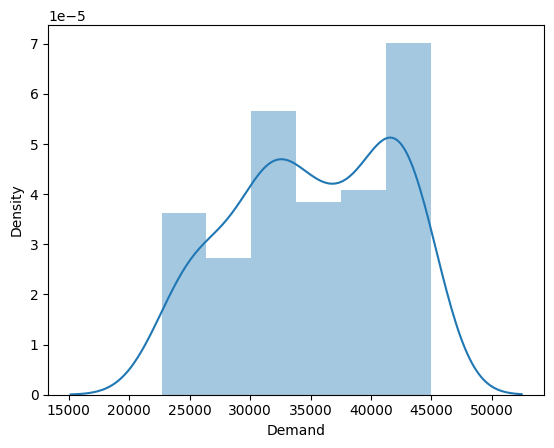

In [14]:
sns.distplot(data_demand_TL['Demand'],hist=True,kde=True)

<Axes: ylabel='Demand'>

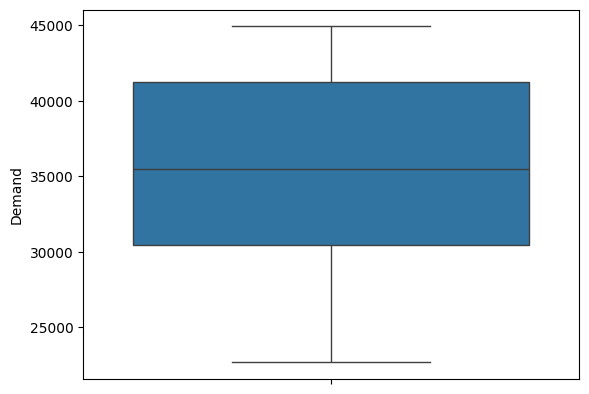

In [15]:
sns.boxplot(data_demand_TL['Demand'])

In [16]:
# 数据标准化
scaler = StandardScaler()  
data_demand_TL_scaler = scaler.fit_transform(data_demand_TL[['Demand']])  
  
# 查看标准化的数据  
print("Scaled Demand:\n", scaled_features)

NameError: name 'scaled_features' is not defined

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


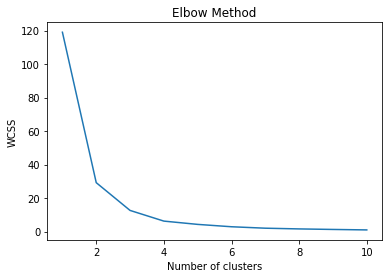

In [63]:
# 肘部法确定k
data_demand = pd.DataFrame(data_demand_TL_scaler, columns=['Demand'])  
  
# 使用肘部法确定最佳k值  
wcss = []  
for i in range(1, 11):  # 假设我们测试从1到10的k值  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  
    kmeans.fit(data_demand)  
    wcss.append(kmeans.inertia_)  # inertia_是WCSS的值  

# 绘制肘部图  
plt.plot(range(1, 11), wcss)  
plt.title('Elbow Method')  
plt.xlabel('Number of clusters')  
plt.ylabel('WCSS')  
plt.show()  

k = 2  
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_demand_TL[['X', 'Y']])  

# 将聚类标签添加到原始DataFrame  
data_demand_TL['Cluster'] = kmeans.labels_  
  
# 肘部图中，通常WCSS下降幅度开始变缓的点是最佳k值  
# 你可以通过观察图形来手动选择这个点，或者使用一些自动化的方法来估计  
# 注意：这里没有包括自动化的方法来找到肘点，因为这通常涉及到主观判断或复杂的统计/机器学习方法

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


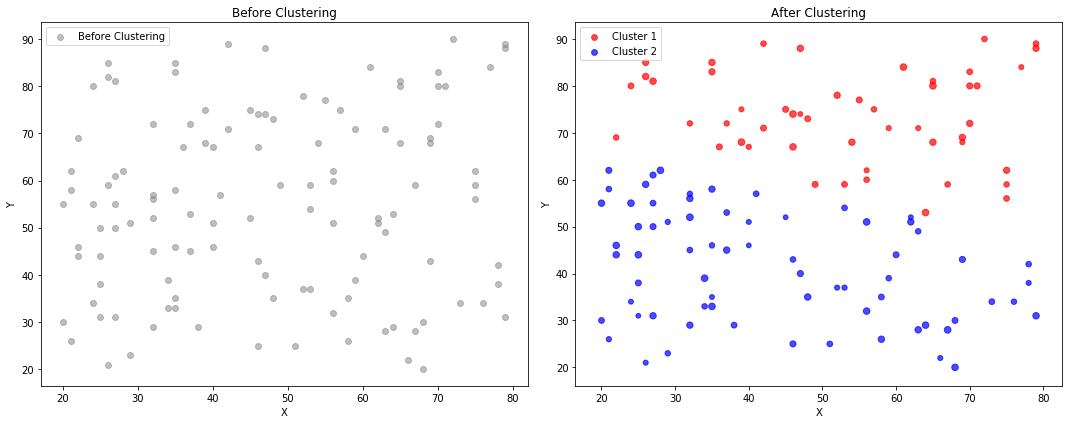

In [64]:
# 可视化分类前的数据  
plt.figure(figsize=(15, 6))  
plt.subplot(1, 2, 1)  
plt.scatter(data_demand_TL['X'], data_demand_TL['Y'], color='grey', alpha=0.5, label='Before Clustering')  
plt.title('Before Clustering')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend()  
  
# 可视化分类后的数据  
plt.subplot(1, 2, 2)  
colors = ['red', 'blue','green']  # 根据聚类标签分配颜色  
for i in range(k):  
    # 这里我们简单地使用点的大小来表示需求量，但也可以考虑使用颜色或其他视觉元素  
    plt.scatter(data_demand_TL[data_demand_TL['Cluster'] == i]['X'], data_demand_TL[data_demand_TL['Cluster'] == i]['Y'],  
                s=data_demand_TL[data_demand_TL['Cluster'] == i]['Demand'] * 0.001,  # 需求量影响点的大小  
                c=colors[i], alpha=0.7, label=f'Cluster {i+1}')  
    
plt.title('After Clustering')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend()  
  
plt.tight_layout()  
plt.show()

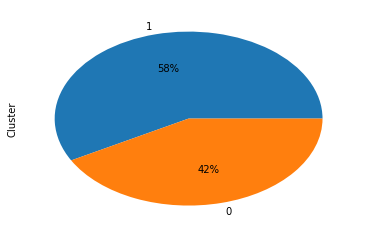

In [65]:
import matplotlib
get_ipython().magic('matplotlib inline')
data_demand_TL['Cluster'].value_counts().plot(kind = 'pie',autopct='%.f%%')

In [68]:
# 根据坐标位置的K-mean聚类分析
data_location_base = pd.DataFrame(data)

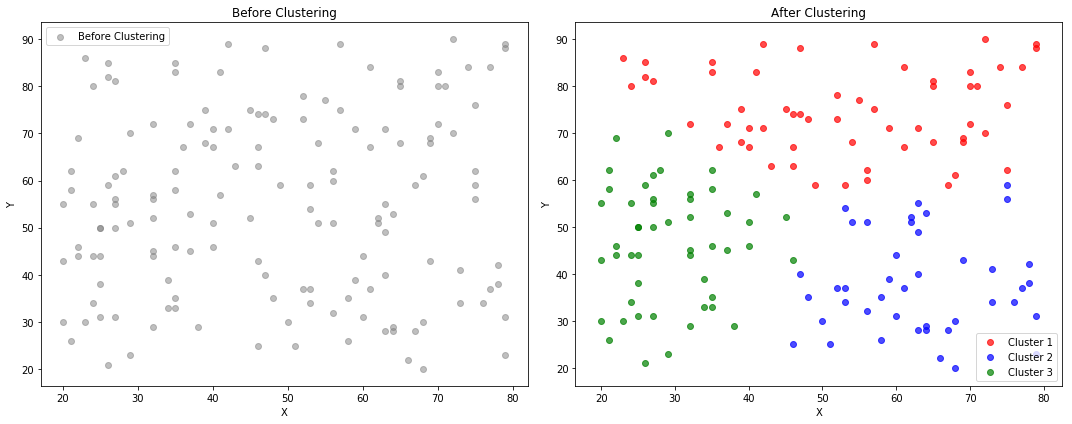

In [70]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_location_base[['X', 'Y']])  

# 将聚类标签添加到原始DataFrame  
data_location_base['Cluster'] = kmeans.labels_  
    
# 可视化分类前的数据  
plt.figure(figsize=(15, 6))  
plt.subplot(1, 2, 1)  
plt.scatter(data_location_base['X'], data_location_base['Y'], color='grey', alpha=0.5, label='Before Clustering')  
plt.title('Before Clustering')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend()  
  
# 可视化分类后的数据  
plt.subplot(1, 2, 2)  
colors = ['red', 'blue','green']  # 根据聚类标签分配颜色  
for i in range(k):  
    # 这里我们简单地使用点的大小来表示需求量，但也可以考虑使用颜色或其他视觉元素  
    plt.scatter(data_location_base[data_location_base['Cluster'] == i]['X'], data_location_base[data_location_base['Cluster'] == i]['Y'],  
                c=colors[i], alpha=0.7, label=f'Cluster {i+1}')  
    
plt.title('After Clustering')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend()  
  
plt.tight_layout()  
plt.show()

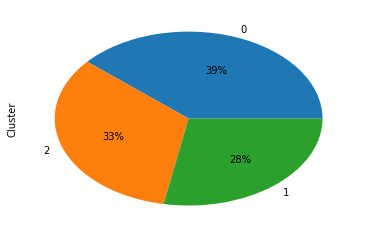

In [71]:
get_ipython().magic('matplotlib inline')
data_location_base['Cluster'].value_counts().plot(kind = 'pie',autopct='%.f%%')